Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений, где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4) Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [5]:
import numpy as np
from scipy import linalg
%matplotlib inline
from matplotlib import pylab as plt
import math

In [31]:
def funct(x):
    myf = math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)
    return myf

In [46]:
xb = np.arange(0, 15, 0.1)
yb = np.sin(xb / 5) * np.exp(xb / 10) + 5 * np.exp(-xb / 2)

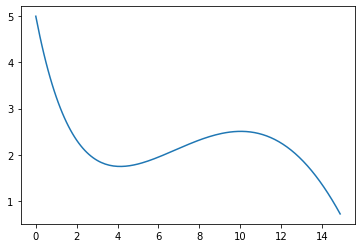

In [47]:
plt.plot(xb, yb)
plt.show()

In [82]:
a = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
b = np.array([funct(1), funct(4), funct(10), funct(15)])

ans = linalg.solve(a, b)

In [83]:
x1 = np.arange(0, 15, 0.1)
y1 = ans[0] + ans[1]*x1 + ans[2]*x1*x1 + ans[3]*x1*x1*x1

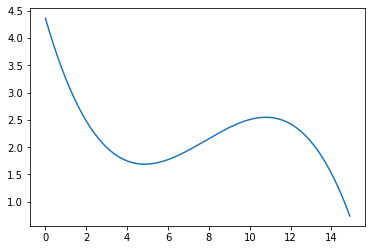

In [84]:
plt.plot(x1, y1)
plt.show()

In [85]:
with open('submission-2.txt', 'w') as fh:
    fh.write('{} {} {} {}'.format(ans[0], ans[1], ans[2], ans[3]))